In [1]:
from io import StringIO
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import datetime
import time
import feature_handler as handler

In [2]:
Stock_list = pd.read_csv('name.csv')['name']
date = pd.read_csv('date.csv')['date']
Stock = pd.read_csv('model.csv')
Stock = Stock.drop_duplicates()

In [3]:
day = 3
upper = 0.04
lower = -0.02
labelp = "p" + str(day) + "_" + str(upper)
labeld = "d" + str(day) + "_" + str(upper)
handler.rise_estimate(Stock, day , upper , lower)
handler.drop_estimate(Stock, day , upper , lower)

max() arg is an empty sequence 448796
min() arg is an empty sequence 448796


In [4]:
Klist = ['最高價','收盤價','成交金額']
i=0
while i<len(Klist):
    name=str(Klist[i])
    Stock[(name+"比率")]=""
    temp=Stock[name].shift(+1)
    Stock[(name+"比率")]=Stock[name]/(temp+0.000001)
    i+=1
Stock

,證券代號,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,本益比,...,pre3p0.05,pre1d0.03,pre1p0.03,均漲天數,均跌天數,超漲跌,p3_0.04,d3_0.04,最高價比率,收盤價比率
0,1102.0,7513759.0,4346.0,285110415.0,37.65,38.05,37.65,37.90,0.10,11.59,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1102.0,7025972.0,3222.0,265972841.0,38.00,38.10,37.10,37.40,0.50,11.44,...,0,0,0,0,0,0,0,0,1.001314,0.986807
2,1102.0,6763011.0,4012.0,255739107.0,37.40,38.00,37.40,37.95,0.55,11.61,...,0,0,0,0,0,0,0,0,0.997375,1.014706
3,1102.0,12381905.0,4961.0,472115302.0,38.00,38.35,37.60,38.35,0.40,11.73,...,0,0,0,0,0,0,0,0,1.009210,1.010540
4,1102.0,12821758.0,6876.0,496478492.0,38.05,39.20,38.05,38.85,0.50,11.88,...,0,0,1,0,0,0,0,0,1.022164,1.013038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448792,9958.0,6048171.0,3774.0,672012377.0,109.50,113.00,108.00,112.00,4.00,26.11,...,0,0,1,2,-3,0,0,0,1.008929,1.037037
448793,9958.0,4904465.0,3572.0,552281211.0,114.00,114.50,110.00,110.50,1.50,25.76,...,0,0,0,2,-3,0,0,0,1.013274,0.986607
448794,9958.0,5095417.0,3180.0,566199561.0,111.00,114.50,107.00,110.50,0.00,25.76,...,0,1,0,2,-3,0,0,0,1.000000,1.000000
448795,9958.0,4310698.0,2820.0,487456579.0,113.50,114.00,112.00,112.00,1.50,26.11,...,0,0,1,2,-3,0,0,0,0.995633,1.013575


In [5]:
Stock.columns.values

array(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', 'ratio', '外資進出',
       '外資進', '外資出', '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出',
       '避險進', '避險出', '三大', 'date', '年前高', '季前高', 'MA5', 'MA10', 'MA20',
       'MA60', 'buy5', 'buy10', '外5', '外10', '投5', '投10', '自5', '三大5',
       '三大10', '日振幅', '波動率', 'MA交叉型態', 'K', 'D', 'KD交叉型態', 'KD交叉型態2',
       '漲跌', 'RSI5', 'MA5 slope', 'MA10 slope', 'MA60 slope',
       'ratio slope', 'margin slope', 'short slope', '三大 slope',
       '外資5 slope', '投信5 slope', '自營 slope', 'buy5 slope', 'buy10 slope',
       'MA5 acc', 'RSI5鈍化', '外5金', '投5金', '自5金', '融資金', '融卷金', '實紅棒',
       '紅棒天線', '實黑棒', '黑棒天線', '上避雷針', '下避雷針', '連漲跌', 'D5', 'D60', 'D三大',
       'D_upper_day', 'UD5', 'UD60', 'UD前高壓力', 'UD波段壓立', '均線糾結1', '均線糾結2',
       '三陽開泰', '突破前高', '均買量', 'R_散戶', 'pre5d0.1', 'pre5p0.1', 'pre3d0.05',
       'pre3p0.05', 'pre1d0.03', 'pre1p0.03', '均漲天數', '均跌天數', '超漲跌',
   

In [6]:
Stock[labeld].value_counts()

0    407778
1     41019
Name: d3_0.04, dtype: int64

In [7]:
Stock[labelp].value_counts()

0    403805
1     44992
Name: p3_0.04, dtype: int64

## 只選top50
list_s = pd.read_csv('150股票代號.csv').代號

test = Stock [Stock.證券代號.isin(list_s[0:49])]
test[labelp].value_counts()

In [8]:
Stock

,證券代號,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,本益比,...,pre3p0.05,pre1d0.03,pre1p0.03,均漲天數,均跌天數,超漲跌,p3_0.04,d3_0.04,最高價比率,收盤價比率
0,1102.0,7513759.0,4346.0,285110415.0,37.65,38.05,37.65,37.90,0.10,11.59,...,0,0,0,0,0,0,0,0,NaN,NaN
1,1102.0,7025972.0,3222.0,265972841.0,38.00,38.10,37.10,37.40,0.50,11.44,...,0,0,0,0,0,0,0,0,1.001314,0.986807
2,1102.0,6763011.0,4012.0,255739107.0,37.40,38.00,37.40,37.95,0.55,11.61,...,0,0,0,0,0,0,0,0,0.997375,1.014706
3,1102.0,12381905.0,4961.0,472115302.0,38.00,38.35,37.60,38.35,0.40,11.73,...,0,0,0,0,0,0,0,0,1.009210,1.010540
4,1102.0,12821758.0,6876.0,496478492.0,38.05,39.20,38.05,38.85,0.50,11.88,...,0,0,1,0,0,0,0,0,1.022164,1.013038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448792,9958.0,6048171.0,3774.0,672012377.0,109.50,113.00,108.00,112.00,4.00,26.11,...,0,0,1,2,-3,0,0,0,1.008929,1.037037
448793,9958.0,4904465.0,3572.0,552281211.0,114.00,114.50,110.00,110.50,1.50,25.76,...,0,0,0,2,-3,0,0,0,1.013274,0.986607
448794,9958.0,5095417.0,3180.0,566199561.0,111.00,114.50,107.00,110.50,0.00,25.76,...,0,1,0,2,-3,0,0,0,1.000000,1.000000
448795,9958.0,4310698.0,2820.0,487456579.0,113.50,114.00,112.00,112.00,1.50,26.11,...,0,0,1,2,-3,0,0,0,0.995633,1.013575


In [101]:
test = Stock[Stock['成交金額'] > 200000000]
test = test[test['連漲跌'] > 0]
test = test[test['融資餘'] > 1000]
test = test[test['融卷餘'] > 10]

test[labelp].value_counts()


0    25802
1     4240
Name: p3_0.04, dtype: int64

day = [5]
upper = 0.1
lower = -0.05
for i in day:
    drop_estimate(Stock, i , upper , lower)

In [102]:
test.columns

Index(['證券代號', '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價', '漲跌價差',
       '本益比',
       ...
       'pre3p0.05', 'pre1d0.03', 'pre1p0.03', '均漲天數', '均跌天數', '超漲跌', 'p3_0.04',
       'd3_0.04', '最高價比率', '收盤價比率'],
      dtype='object', length=108)

In [103]:
for_model = test.drop([ '成交股數', '成交筆數', '成交金額', '開盤價', '最高價', '最低價', '收盤價',
        '漲跌價差', '融資買', '融資賣', '融資餘', '融卷買', '融卷賣', '融卷餘', '外資進出', '外資進', '外資出',  
        '三大', '外5', '投5', 'MA5', 'MA10', 'MA20', 'MA60', 'buy5', 'buy10','外10' , '投10', '自5', '三大5', '三大10',
       '投信進出', '投信進', '投信出', '自營進出', '自營進', '自營出', '避險進出', '避險進', '避險出'
        ,'R_散戶','年前高', '季前高'],axis = 1)

In [104]:
for_model.columns

Index(['證券代號', '本益比', 'ratio', 'date', '日振幅', '波動率', 'MA交叉型態', 'K', 'D',
       'KD交叉型態', 'KD交叉型態2', '漲跌', 'RSI5', 'MA5 slope', 'MA10 slope',
       'MA60 slope', 'ratio slope', 'margin slope', 'short slope', '三大 slope',
       '外資5 slope', '投信5 slope', '自營 slope', 'buy5 slope', 'buy10 slope',
       'MA5 acc', 'RSI5鈍化', '外5金', '投5金', '自5金', '融資金', '融卷金', '實紅棒', '紅棒天線',
       '實黑棒', '黑棒天線', '上避雷針', '下避雷針', '連漲跌', 'D5', 'D60', 'D三大', 'D_upper_day',
       'UD5', 'UD60', 'UD前高壓力', 'UD波段壓立', '均線糾結1', '均線糾結2', '三陽開泰', '突破前高',
       '均買量', 'pre5d0.1', 'pre5p0.1', 'pre3d0.05', 'pre3p0.05', 'pre1d0.03',
       'pre1p0.03', '均漲天數', '均跌天數', '超漲跌', 'p3_0.04', 'd3_0.04', '最高價比率',
       '收盤價比率'],
      dtype='object')

In [105]:
model = for_model[for_model['date'] >  date [len(date)-(70)]]
#normal = normal[normal[labelp] == 0]

#detect = for_model[for_model[labelp] == 1]
#detect = detect[for_model['date'] >  date [len(date)-(70)]]
#model = detect.append(normal)

In [106]:
model[labeld].value_counts()

0    23099
1     4110
Name: d3_0.04, dtype: int64

In [107]:
model[labelp].value_counts()

0    23296
1     3913
Name: p3_0.04, dtype: int64

In [108]:
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
flag = True
cost =  model[labelp].value_counts()[0] /  model[labelp].value_counts()[1]

In [109]:
drop_precision_test = pd.DataFrame()
precision_test = pd.DataFrame()

In [114]:
pre_date = []
pre = [] 
for i in range(1):
    K = i 
    interval = 30
    t = model[model['date'] <= date [K]]
    trainp = t [t['date'] < date [K+interval] ]
    testp = t [t['date'] >= date [K+interval] ]
    #ros = RandomOverSampler(random_state42)

    X_train = trainp.drop(['date','證券代號', labelp,labeld ],axis = 1)
    y_train = trainp[labelp]

    X_test = testp.drop(['date', '證券代號',labelp,labeld],axis = 1)
    y_test = testp[labelp]

    #X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
    #ros = RandomOverSampler(random_state = 40)

    #X_train, y_train = ros.fit_resample(X_train, y_train)


    xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
                  colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.1, max_delta_step=0, max_depth=5,
                  min_child_weight=1, monotone_constraints='()',
                  n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
                  random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
                  seed=27, subsample=0.8, tree_method='exact',
                  validate_parameters=1, verbosity=None)
    xgbc.fit(X_train,y_train)
    y_test_predp = xgbc.predict(X_test)
    y_train_predp = xgbc.predict(X_train)

    threshold = 0.55
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    if (len ( y_test[y_test == 1]) == 0) :
        pre.append(-0.1)
    else :
        pre.append(precision_score(y_test ,predicted))
    pre_date.append(date[i])
    

In [115]:
confusion_matrix( y_train ,y_train_predp)

array([[18982,  1653],
       [   82,  3292]], dtype=int64)

In [122]:
threshold = 0.5
predicted_proba = xgbc.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
confusion_matrix(y_test, predicted)

array([[2245,  416],
       [ 429,  110]], dtype=int64)

In [123]:
precision_score(y_test ,predicted)

0.20912547528517111

In [64]:
index = pd.read_csv('Market_index.csv')
index = index[index['Index']=='發行量加權股價指數']

In [65]:
index = index[index.date >= pre_date[-1]]

index.sort_values(by=['date'] , ascending=True, axis =0 , inplace=True)

index = index.reset_index(drop=True)
index

,Index,收盤,漲跌,漲跌%,date
0,發行量加權股價指數,15906.41,305.32,-1.88,20210304
1,發行量加權股價指數,15855.23,51.18,-0.32,20210305
2,發行量加權股價指數,15820.11,35.12,-0.22,20210308
3,發行量加權股價指數,15853.09,32.98,0.21,20210309
4,發行量加權股價指數,15911.67,58.58,0.37,20210310
5,發行量加權股價指數,16179.56,267.89,1.68,20210311
6,發行量加權股價指數,16255.18,75.62,0.47,20210312
7,發行量加權股價指數,16249.33,5.85,-0.04,20210315
8,發行量加權股價指數,16313.16,63.83,0.39,20210316
9,發行量加權股價指數,16215.82,97.34,-0.60,20210317


In [66]:
precision_test['date'] = pre_date
precision_test['precision'] = pre

In [143]:
pre_date = []
pre = [] 


for i in range(1):
    K = i+2
    interval = 30
    t = model[model['date'] <= date [K]]

    trainp = t [t['date'] < date [K+interval] ]
    testp = t [t['date'] >= date [K+interval] ]
    #ros = RandomOverSampler(random_state42)

    X_train = trainp.drop(['date','證券代號', labelp,labeld ],axis = 1)
    y_train = trainp[labeld]

    X_test = testp.drop(['date', '證券代號',labelp,labeld],axis = 1)
    y_test = testp[labeld]

    #X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)
    #ros = RandomOverSampler(random_state = 40)

    #X_train, y_train = ros.fit_resample(X_train, y_train)


    xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
                  colsample_bynode=1, colsample_bytree=0.8, gamma=0.01, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.1, max_delta_step=0, max_depth=6,
                  min_child_weight=1, monotone_constraints='()',
                  n_estimators=400, n_jobs=4, nthread=4, num_parallel_tree=1,
                  random_state=27, reg_alpha=0, reg_lambda=1, scale_pos_weight=cost,
                  seed=27, subsample=0.8, tree_method='exact',
                  validate_parameters=1, verbosity=None)
    xgbc.fit(X_train,y_train)
    y_test_predp = xgbc.predict(X_test)
    y_train_predp = xgbc.predict(X_train)

    threshold = 0.55
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    
    if (len ( y_test[y_test == 1]) == 0) :
        pre.append(-0.1)
    else :
        pre.append(precision_score(y_test ,predicted))
    pre_date.append(date[i])

In [144]:
confusion_matrix( y_train ,y_train_predp)

array([[19360,   838],
       [    7,  3671]], dtype=int64)

In [149]:
threshold = 0.7
predicted_proba = xgbc.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
confusion_matrix(y_test, predicted)

array([[2607,   94],
       [ 370,   30]], dtype=int64)

In [150]:
precision_score(y_test ,predicted)

0.24193548387096775

In [130]:
drop_precision_test['date'] = pre_date
drop_precision_test['precision'] = pre

AttributeError: 'DataFrame' object has no attribute 'precision'

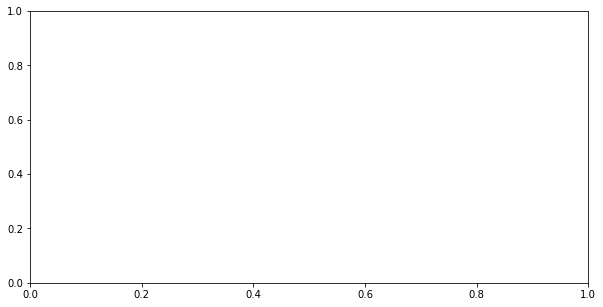

In [68]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(drop_precision_test.precision,color='green',label='drop_precision')
ax.set_ylabel('drop_precision',color='green',fontsize=20)
ax.tick_params(axis='y',labelcolor='skyblue')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(precision_test.precision,color='red',label='rise_precision')
ax2.set_ylabel('rise_precision',color='red',fontsize=20)
ax2.tick_params(axis='y',labelcolor='red')
ax2.legend(loc='upper right')

plt.title('precision v.s. ', color='limegreen')


threshold = 0.3
i = 0
while i < 50 :
    threshold += (i/2000)
    predicted_proba = xgbc.predict_proba(X_test)
    predicted = (predicted_proba [:,1] >= threshold).astype('int')
    precision = precision_score(y_test, predicted)
    i+=1
    print (threshold ,' : ' ,precision)

AttributeError: 'DataFrame' object has no attribute 'precision'

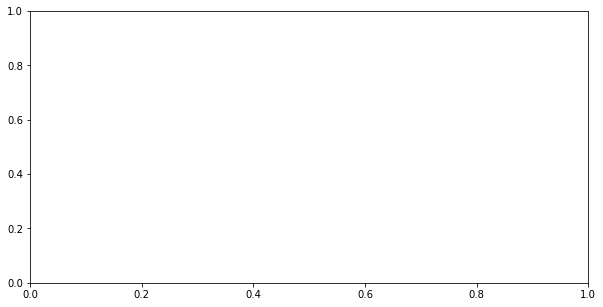

In [69]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(drop_precision_test.precision,color='green',label='drop_precision')
ax.set_ylabel('drop_precision',color='green',fontsize=20)
ax.tick_params(axis='y',labelcolor='skyblue')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(index.收盤,color='black',label='Market')
ax2.set_ylabel('Market',color='black',fontsize=20)
ax2.tick_params(axis='y',labelcolor='black')
ax2.legend(loc='upper right')

plt.title('precision v.s. Market ', color='limegreen')


Text(0.5, 1.0, 'precision v.s. Market ')

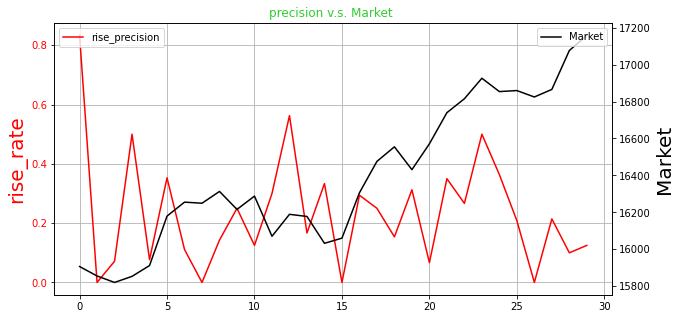

In [70]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot(precision_test.precision,color='red',label='rise_precision')
ax.set_ylabel('rise_rate',color='red',fontsize=20)
ax.tick_params(axis='y',labelcolor='red')
plt.grid()
ax.legend(loc='upper left')

ax2=ax.twinx()
ax2.plot(index.收盤,color='black',label='Market')
ax2.set_ylabel('Market',color='black',fontsize=20)
ax2.tick_params(axis='y',labelcolor='black')
ax2.legend(loc='upper right')

plt.title('precision v.s. Market ', color='limegreen')


In [ ]:

fig,ax=plt.subplots(figsize=(10,5))
ax.plot((precision_test.precision + drop_precision_test.precision),color='red',label='rise_precision')
ax.set_ylabel('rise_precision',color='red',fontsize=20)
ax.tick_params(axis='y',labelcolor='red')
plt.grid()
ax.legend(loc='upper left')


plt.title('precision v.s. Market ', color='limegreen')

In [151]:
feature=pd.DataFrame()
feature['name'] = X_train.columns
feature['score'] = xgbc.feature_importances_

feature.sort_values(by=['score'] , ascending=False, axis =0 , inplace=True)

feature[0:50]

,name,score
2,日振幅,0.035448
3,波動率,0.034493
38,D60,0.024066
42,UD60,0.022182
28,融資金,0.021137
51,pre5p0.1,0.021009
26,投5金,0.019951
55,pre1p0.03,0.019734
19,投信5 slope,0.019720
29,融卷金,0.019631


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch

In [ ]:
import torch.utils.data as data
import io
import imageio
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
from tqdm import tqdm_notebook as tqdm #pip install tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd
import numpy as np
import os

In [ ]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [ ]:
class network(nn.Module):
    def __init__(self):
        super(network,self).__init__()
        self.L1 = nn.Linear(58,30)
        self.L2 = nn.Linear(30,18)
        self.L3 = nn.Linear(18,10)
        self.L4 = nn.Linear(10,7)
        self.L5 = nn.Linear(7,4)
        self.output = nn.Linear(4,2)
    def forward(self , x):
        x = F.relu(self.L1(x))
        x = F.relu(self.L2(x))
        x = F.relu(self.L3(x))
        x = F.relu(self.L4(x))
        x = F.relu(self.L5(x))
        x = self.output(x)
        return x

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [ ]:
X_train, y_train = ros.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
print(sorted(Counter(y_train).items()))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_train = X_train_std 

sc.fit(X_test)
X_valid_std = sc.transform(X_test)
X_valid = X_valid_std

In [ ]:
X_train.shape,y_train.shape

In [ ]:
tensor_x = torch.from_numpy(X_train)
tensor_y = torch.from_numpy(y_train.to_numpy())
tensor_y = torch.squeeze(tensor_y)
tensor_x_test = torch.from_numpy(X_valid)
tensor_y_test = torch.from_numpy(y_test.to_numpy())
tensor_y_test = torch.squeeze(tensor_y_test)

In [ ]:
#trans = transforms.Compose([transforms.ToTensor()]) 
#train_set = dset.MNIST(root='.', train=True, download=True ,transform=trans)
#test_set = dset.MNIST(root='.', train=False,transform=trans)
train_set = data.TensorDataset(tensor_x,tensor_y)
test_set = data.TensorDataset(tensor_x_test,tensor_y_test)
train_dataset = data.DataLoader(dataset =  train_set,batch_size=100,shuffle=True)
test_dataset = data.DataLoader(dataset = test_set , batch_size=100)

In [ ]:
use_cuda = torch.cuda.is_available()
use_cuda

In [ ]:
use_cuda = torch.cuda.is_available()
net = network()
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=net.parameters())
loss_history = []
if use_cuda:
    net = net.cuda()
for e in tqdm(range(30)):
    epoch_loss_sum = 0
    for x , y in tqdm(train_dataset):
        if use_cuda:
            x = x.cuda()
            y = y.cuda()
        batch_size = x.shape[0]
        x = x.view(batch_size,-1)
        net_out = net(x.float())
        loss = loss_fn(net_out , y)
        epoch_loss_sum += float(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    loss_history.append(epoch_loss_sum)

In [ ]:
correct_count = 0
total_testing = len(test_set)
for x,y in test_dataset:
    if use_cuda:
        x = x.cuda()
        y = y.cuda().detach()
    batch_size = x.shape[0]
    x = x.view(batch_size,-1)
    output = net(x.float()).max(1)[1] #output出來是一個向量
    correct_count += torch.sum(output==y).item()
    #print(torch.sum(output==y))
    #print("output = {}".format(output))
    #print("y = {}".format(y))
    #print("======")
#print(correct_count, total_testing)
#correct_count = correct_count
print('accuracy rate',correct_count/total_testing)

In [ ]:
y_pred = net(tensor_x_test.float()).max(1)[1]
y_prediction = y_pred.detach().cpu().numpy() 
y_prediction


In [ ]:
y_test2 = tensor_y_test.numpy()

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion Matrix : ")
confusion_matrix(y_test,y_prediction)

In [ ]:
y_test.value_counts()